In [1]:
import numpy as np
import matplotlib.pyplot as plt

from py.params import setParams

In [2]:
def sig(x, beta, mu):
    return 1/(1+np.exp(-beta*(x-mu)))

def sig_deriv(x, beta, mu):
    return (beta*np.exp(-beta*(x-mu))/(1+np.exp(-beta*(x-mu)))**2)

def w(x, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(((x**2))/(2*(sigma**2))))

def w_hat(sigma, k):
    return np.exp(-(1/2) * (sigma**2) * (k**2) )

In [3]:
x = np.linspace(-10,10,101)

b_vals = np.zeros((3, len(x)))
betas = [0.5, 1, 5]
print(b_vals[1].shape)
count = 0
for beta in betas:
    b_vals[count] = sig(x, beta, 0)
    count+=1

f = sig(x, 0.5, 0)
df = sig_deriv(x, 2, 2)

kern = w(x, 2)

kern_hat = w_hat(x, 2)

(101,)


Text(0, 0.5, 'F(x)')

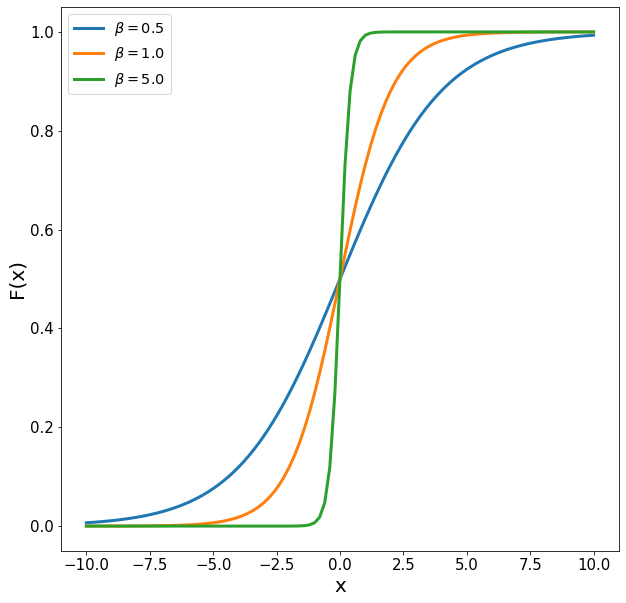

In [4]:
plt.figure(figsize=(10,10))

for idx in range(3):
    plt.plot(x, b_vals[idx], label=r'$\beta=%.1f$' %betas[idx], lw=3)
    
plt.legend(fontsize='x-large')
plt.xticks(size=15)
plt.xlabel('x', fontsize=20)
plt.yticks(size=15)
plt.ylabel('F(x)', fontsize=20)

/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:44: RuntimeWarning: divide by zero encountered in true_divide
  return params.mu_e - (1/params.beta_e) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:44: RuntimeWarning: divide by zero encountered in log
  return params.mu_e - (1/params.beta_e) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:47: RuntimeWarning: divide by zero encountered in true_divide
  return params.mu_i - (1/params.beta_i) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:47: RuntimeWarning: divide by zero encountered in log
  return params.mu_i - (1/params.beta_i) * np.log((1/y)-1)


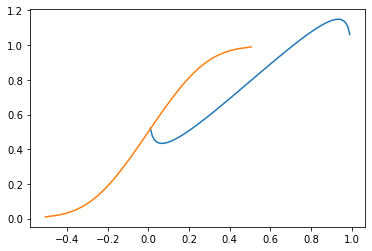

In [13]:
from py.analysis import activity_ui, activity_ue

u=np.linspace(0,1,101)

params = {'I_e': 1.5, 'I_i': 1.5}
ps = setParams(params)

ui_nullcline = activity_ui(u, ps)
ue_nullcline = activity_ue(u, ps)


plt.plot(u, ui_nullcline)
plt.plot(ue_nullcline, u)

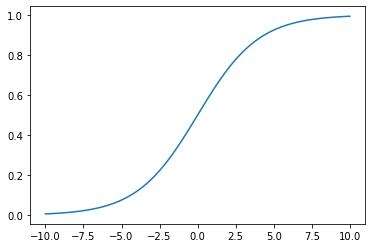

In [14]:
plt.plot(x, f)

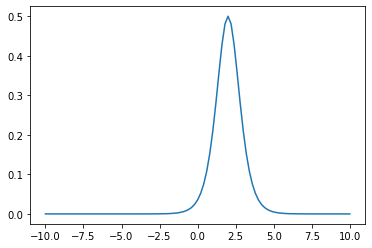

In [7]:
plt.plot(x, df)

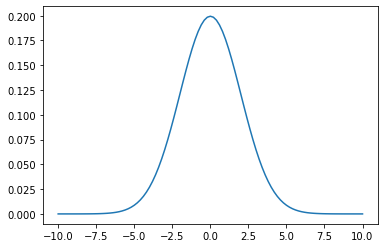

In [8]:
plt.plot(x, kern)

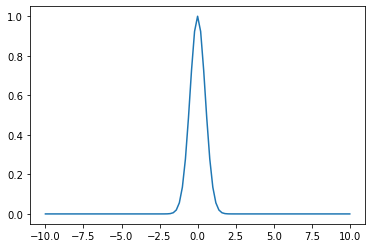

In [9]:
plt.plot(x, kern_hat)

In [10]:
#Investigate the boundaries for spatial extends - IDEA: To get maximal range for the fractions: once divide max_dFe
params = {'sigma_i': 3}
ps = setParams(params)
extend = ps.sigma_i**2/ps.sigma_e**2
extend

9.0

In [11]:
max_dFe = ps.beta_e/4
max_dFi = ps.beta_i/4
small_dFe = sig_deriv(24, ps.beta_e, ps.mu_e)
small_dFi = sig_deriv(20, ps.beta_i, ps.mu_i)

small_dFe

5.6027963747546125e-09

In [12]:
fraction_max = (ps.tau_i*ps.w_ee*max_dFe)/(ps.tau_e*ps.w_ii*small_dFi)
np.log(fraction_max)

16.609438524238648

In [13]:
fraction_min = (ps.tau_i*ps.w_ee*small_dFe)/(ps.tau_e*ps.w_ii*max_dFi)
np.log(fraction_min)

-14.617973376531712

In [14]:
max_be = ps.w_ee*1 - ps.w_ei*0 + 8
min_be = ps.w_ee*0 - ps.w_ei*1 + 0
print('Max input to Fe: %.2f, min input to Fe: %.2f' %(max_be, min_be))

Max input to Fe: 24.00, min input to Fe: -12.00


In [15]:
max_bi = ps.w_ie*1 - ps.w_ii*0 + 8
min_bi = ps.w_ie*0 - ps.w_ii*1 + 0
print('Max input to Fi: %.2f, min input to Fi: %.2f' %(max_bi, min_bi))

Max input to Fi: 20.00, min input to Fi: -3.00
